In [1]:
import math
from statistics import mean 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import csv
import pandas as pd
from scipy.sparse.csgraph import minimum_spanning_tree
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import networkx as nx
from plotly.figure_factory import create_dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


In [2]:
def random_GARCH(Sigma):
        u1 = np.random.uniform(size=1)
        u2 = np.random.uniform(size=1)
        R_sq = -2 * np.log(u1)
        theta = 2 * np.pi * u2
        Variance = 1
        mean = 0
        X_i = (((np.sqrt(R_sq) * np.cos(theta))*Variance)+mean)*Sigma
        return X_i

In [3]:
def GARCH(a_0,a_1,b_1):
    Sigma = 1
    X = []
    no_reps = 10000
    for i in range(no_reps):
        X_i = random_GARCH(Sigma)
        #print(X_i)
        Sigma_squared = a_0 + (a_1*X_i*X_i) + b_1*Sigma*Sigma
        Sigma = np.sqrt(Sigma_squared)
        X.append(X_i)
        #print(i)
    return(X)

In [4]:
def GARCH_Multi(GARCH_Array):
    Sigma_Array = []
    for i in range(len(GARCH_Array)):
        Sigma_Array.append(1)
    X_Array = []
    no_reps = 100000
    for i in range(no_reps):
        X_current = []
        for j in range(len(GARCH_Array)):
            X_current.append(random_GARCH(Sigma_Array[j]))
        sig_current = []
        for j in range(len(GARCH_Array)):
            Sigma_Current = GARCH_Array[j][0]+X_current[j]*X_current[j]*GARCH_Array[j][1]+GARCH_Array[j][2]*Sigma_Array[j]*Sigma_Array[j]
            num = 0
            for k in range(len(GARCH_Array)):
                if j!=k:
                    Sigma_Current = Sigma_Current + GARCH_Array[j][(num*2)+3]*X_current[k]*X_current[k]+GARCH_Array[j][(num*2)+4]*Sigma_Array[k]*Sigma_Array[k]
                    num=+1
            sig_current.append(np.sqrt(Sigma_Current))
        X_Array.append(X_current)
        Sigma_Array = sig_current
    return X_Array

In [5]:
def plotting(GARCH_Array):
    X_values = GARCH_Multi(GARCH_Array)
    for j in range(len(GARCH_Array)):
        Plotter = []
        for i in range(len(X_values)):
            Plotter.append(X_values[i][j])
        Label = "Stock " + str(j+1)
        plt.plot(Plotter, label=Label)
    plt.xlabel("day")
    plt.ylabel("X_i values, (log return)")
    plt.title("multiple intergrated GARCH processes")
    plt.legend()
    plt.show()

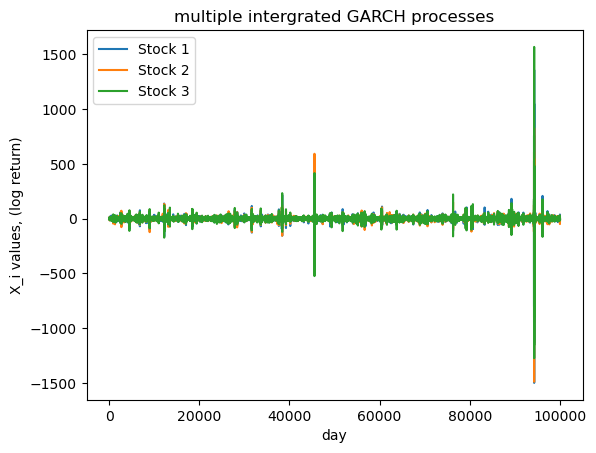

In [6]:
GARCH_Array = np.array([[1,0.01,0.3,0.1,0.1,0.25,0.1],
                       [1,0.01,0.3,0.1,0.1,0.25,0.1],
                       [1,0.3,0.3,0.1,0.1,0.25,0.1]])
#garch_1 = GARCH_Multi(GARCH_Array)
#print(garch_1)
#GARCH_Array = [[1,0.45,0.5,0.0,0.0],
#               [1,0.05,0.5,0.0,0.0]]
#garch_1 = GARCH_Multi(GARCH_Array)
#GARCH_Array = np.array([[0.1, 0.45, 0.5, 0.0, 0.0],
#                        [0.1, 0.35, 0.5, 0.0, 0.0]])
#garch_2 = GARCH_Multi(GARCH_Array)
#GARCH_Array = [[1,0.45,0.5]]
garch_2 = GARCH_Multi(GARCH_Array)
plotting(GARCH_Array)
#print(garch_2)

In [7]:
#plt.plot(GARCH(1,0.3,0.5))
#plt.plot(GARCH(1,0.35,0.1))
#plt.plot(GARCH(1,0.05,0.1))

In [8]:
#for i in range(len(garch_2)):
    #print(garch_2[i])

In [9]:
#GARCH_Array = np.array([[1, 0.05, 0.5, 0.2, 0.2],
#                        [1, 0.4, 0.5, 0.0, 0.0]])
#garch_2 = GARCH_Multi(GARCH_Array)
#GARCH_Array = np.array([[1,0.05,0.5]])
#garch_2 = GARCH_Multi(GARCH_Array)

In [10]:
for j in range(len(GARCH_Array)):
    List = []
    for i in range(len(garch_2)):
        List.append(garch_2[i][j])
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    print(STANDARD)
    #print(MEAN)

numerator = GARCH_Array[0,0]+(GARCH_Array[0,3]+GARCH_Array[0,4])*GARCH_Array[1,0]/(1-GARCH_Array[1,1]-GARCH_Array[1,2])
denominator = (1-GARCH_Array[0,1]-GARCH_Array[0,2])-((GARCH_Array[0,3]+GARCH_Array[0,4])*(GARCH_Array[1,3]+GARCH_Array[1,4]))/(1-GARCH_Array[1,1]-GARCH_Array[1,2])
print(np.sqrt(numerator/denominator))    
    
    
numerator = GARCH_Array[1,0]+(GARCH_Array[1,3]+GARCH_Array[1,4])*GARCH_Array[0,0]/(1-GARCH_Array[0,1]-GARCH_Array[0,2])
denominator = (1-GARCH_Array[1,1]-GARCH_Array[1,2])-((GARCH_Array[1,3]+GARCH_Array[1,4])*(GARCH_Array[0,3]+GARCH_Array[0,4]))/(1-GARCH_Array[0,1]-GARCH_Array[0,2])
print(np.sqrt(numerator/denominator))

7.043948285448951
7.508647900640597
7.947898443723759
1.4285714285714286
1.4285714285714286


In [11]:
SD_LIST = []
SD_LIST_2 = []
for j in range(len(GARCH_Array)):
    List = []
    for i in range(len(garch_2)):
        List.append(garch_2[i][j])
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    SD_LIST.append(STANDARD*STANDARD)

SD_LIST_2.append((GARCH_Array[0,0]+(GARCH_Array[0,3]+GARCH_Array[0,4])*SD_LIST[1]+(GARCH_Array[0,3]+GARCH_Array[0,4])*SD_LIST[2])/(1-GARCH_Array[0,1]-GARCH_Array[0,2]))
SD_LIST_2.append((GARCH_Array[1,0]+(GARCH_Array[1,3]+GARCH_Array[1,4])*SD_LIST[0]+(GARCH_Array[1,3]+GARCH_Array[1,4])*SD_LIST[2])/(1-GARCH_Array[1,1]-GARCH_Array[1,2]))
SD_LIST_2.append((GARCH_Array[2,0]+(GARCH_Array[2,3]+GARCH_Array[2,4])*SD_LIST[0]+(GARCH_Array[2,3]+GARCH_Array[2,4])*SD_LIST[1])/(1-GARCH_Array[2,1]-GARCH_Array[2,2]))

In [12]:
print(np.sqrt(SD_LIST))
print(np.sqrt(SD_LIST_2))

[7.04394829 7.5086479  7.94789844]
[6.00842122 5.84302624 7.44973156]


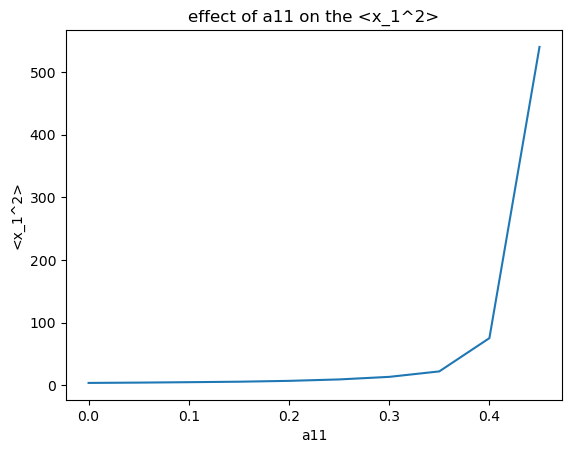

In [13]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[1,i/20,0.5,0.1,0.1],
                            [1,0.05,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/20)
plt.plot(x_array,y_array)
plt.xlabel("a11")
plt.ylabel("<x_1^2>")
plt.title("effect of a11 on the <x_1^2>")
plt.show()
#print(y_array)

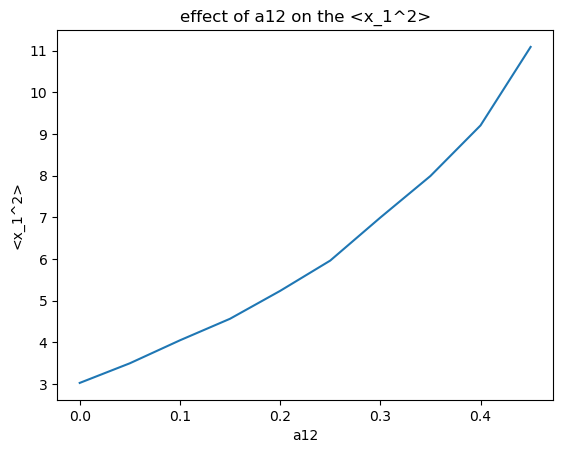

In [14]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[1,0.05,0.5,i/20,0.1],
                            [1,0.05,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/20)
    
plt.xlabel("a12")
plt.ylabel("<x_1^2>")
plt.title("effect of a12 on the <x_1^2>")
plt.plot(x_array,y_array)
plt.show()
#print(y_array)

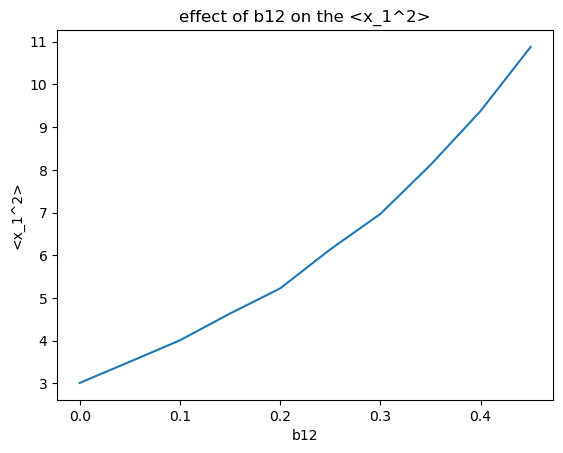

In [15]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[1,0.05,0.5,0.1,i/20],
                            [1,0.05,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/20)
plt.xlabel("b12")
plt.ylabel("<x_1^2>")
plt.title("effect of b12 on the <x_1^2>")
plt.plot(x_array,y_array)
plt.show()

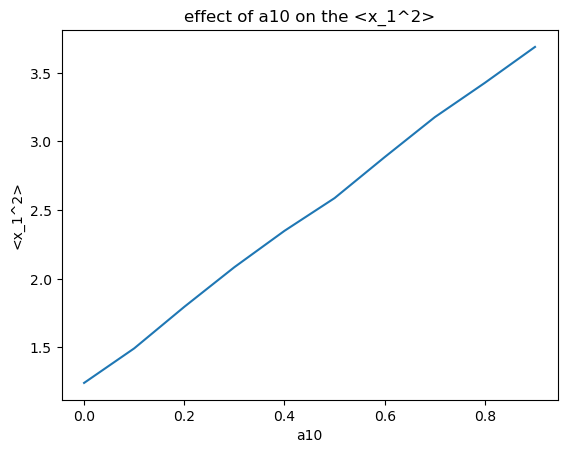

In [16]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[i/10,0.05,0.5,0.1,0.1],
                            [1,0.05,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/10)
plt.xlabel("a10")
plt.ylabel("<x_1^2>")
plt.title("effect of a10 on the <x_1^2>")
plt.plot(x_array,y_array)
plt.show()
#print(y_array)

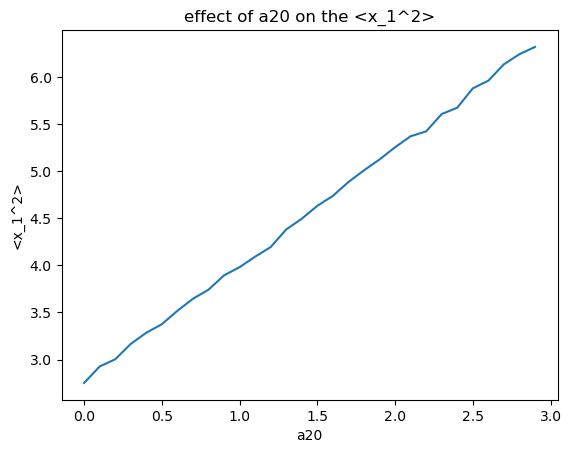

In [17]:
x_array = []
y_array = []
for i in range(30):
    GARCH_Array = np.array([[1,0.05,0.5,0.1,0.1],
                            [i/10,0.05,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/10)
plt.xlabel("a20")
plt.ylabel("<x_1^2>")
plt.title("effect of a20 on the <x_1^2>")
plt.plot(x_array,y_array)
plt.show()

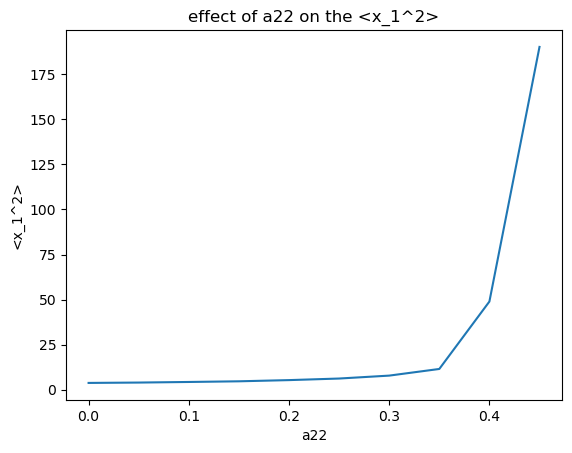

In [18]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[1,0.05,0.5,0.1,0.1],
                            [1,i/20,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/20)
plt.xlabel("a22")
plt.ylabel("<x_1^2>")
plt.title("effect of a22 on the <x_1^2>")
plt.plot(x_array,y_array)
plt.show()

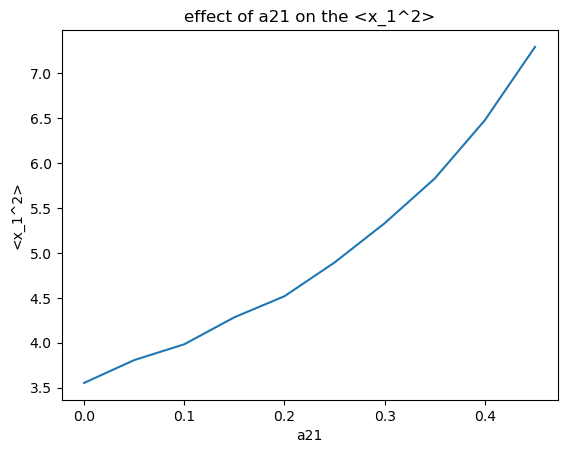

In [19]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[1,0.05,0.5,0.1,0.1],
                            [1,0.05,0.5,i/20,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/20)
plt.xlabel("a21")
plt.ylabel("<x_1^2>")
plt.title("effect of a21 on the <x_1^2>")
plt.plot(x_array,y_array)
plt.show()

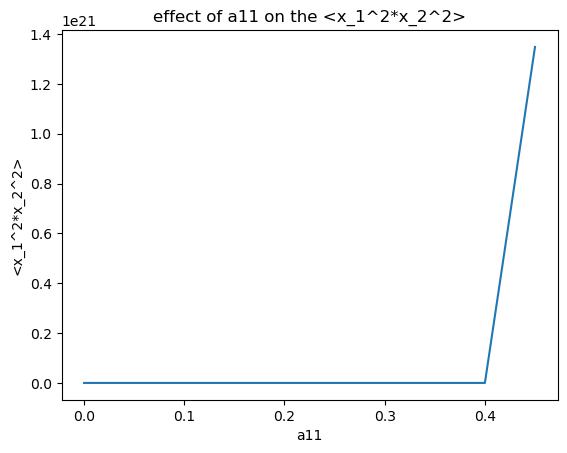

In [20]:
x_array = []
y_array = []
for i in range(10):
    GARCH_Array = np.array([[1,i/20,0.5,0.1,0.1],
                            [1,0.05,0.5,0.1,0.1]])
    garch = GARCH_Multi(GARCH_Array)
    List = []
    for j in range(len(garch)):
        List.append(garch[j][0]*garch[j][0]*garch[j][1]*garch[j][1])
    List = np.array(List)
    List = List*List
    STANDARD = np.std(List)
    MEAN = np.mean(List)
    y_array.append(MEAN)
    x_array.append(i/20)
plt.xlabel("a11")
plt.ylabel("<x_1^2*x_2^2>")
plt.title("effect of a11 on the <x_1^2*x_2^2>")
plt.plot(x_array,y_array)
plt.show()
#plotting(GARCH_Array)

In [21]:
GARCH_Array = np.array([[1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.1,0.1,0.01,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])

#GARCH_Array = np.array([[1,0.01,0.5,0.05,0.05,0.15,0.15],
#                        [1,0.35,0.2,0.0,0.1,0.15,0.15],
#                        [1,0.01,0.5,0.1,0.0,0.15,0.15]])
GARCH_Array = np.array([[1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                        [1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.0,0.0,0.1],
                        [1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0]])

garch = GARCH_Multi(GARCH_Array)
Data_Frame = pd.DataFrame(garch)
Data_Frame_1 = Data_Frame*Data_Frame


RangeIndex(start=0, stop=6, step=1)


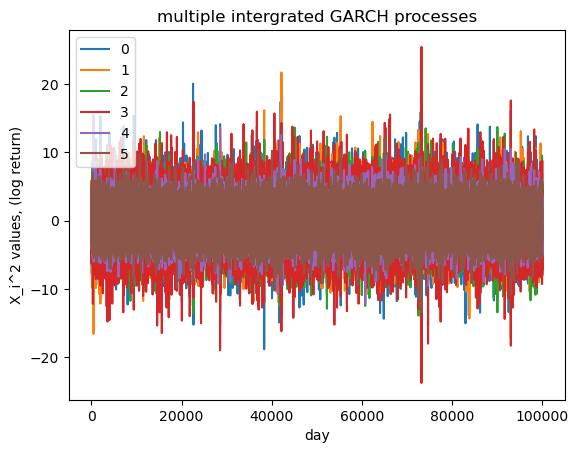

In [22]:
print(Data_Frame_1.columns)
plt.plot(Data_Frame, label = Data_Frame.columns)
plt.xlabel("day")
plt.ylabel("X_i^2 values, (log return)")
plt.title("multiple intergrated GARCH processes")
plt.legend()

In [23]:
Corrilation = Data_Frame_1.corr(numeric_only=False)
print(round(Corrilation,2))
Distance = np.sqrt(2*(1-Corrilation))
print(round(Distance,2))

      0     1     2     3     4     5
0  1.00  0.12  0.12  0.13  0.10  0.09
1  0.12  1.00  0.13  0.12  0.08  0.09
2  0.12  0.13  1.00  0.12  0.08  0.09
3  0.13  0.12  0.12  1.00  0.09  0.10
4  0.10  0.08  0.08  0.09  1.00  0.11
5  0.09  0.09  0.09  0.10  0.11  1.00
      0     1     2     3     4     5
0  0.00  1.33  1.33  1.32  1.34  1.35
1  1.33  0.00  1.32  1.33  1.35  1.35
2  1.33  1.32  0.00  1.33  1.35  1.35
3  1.32  1.33  1.33  0.00  1.35  1.34
4  1.34  1.35  1.35  1.35  0.00  1.34
5  1.35  1.35  1.35  1.34  1.34  0.00


Text(0, 0.5, 'stock 1 x_i values')

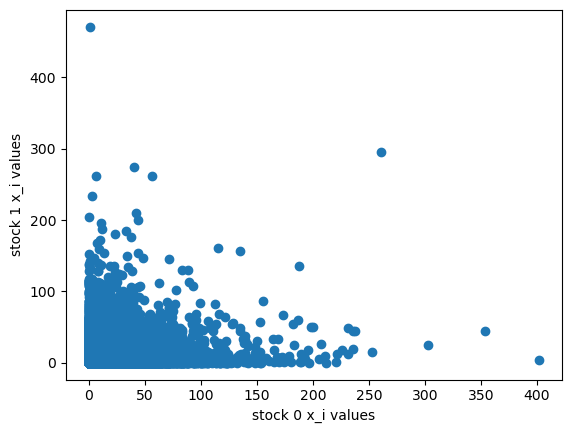

In [24]:
plt.scatter(Data_Frame_1[0],Data_Frame_1[1])
plt.xlabel("stock 0 x_i values")
plt.ylabel("stock 1 x_i values")

In [25]:
tree = minimum_spanning_tree(Distance)
print(tree)
print(tree.toarray())

  (0, 1)	1.3251123912691276
  (0, 3)	1.322408081762259
  (1, 2)	1.3219571814893059
  (4, 5)	1.3369987850079461
  (5, 3)	1.3393937563260656
[[0.         1.32511239 0.         1.32240808 0.         0.        ]
 [0.         0.         1.32195718 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.33699879]
 [0.         0.         0.         1.33939376 0.         0.        ]]


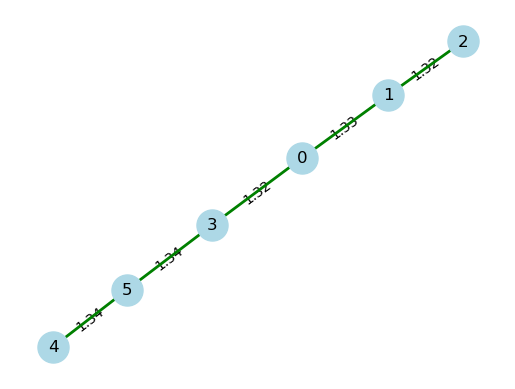

  (0, 1)	1.3251123912691276
  (0, 3)	1.322408081762259
  (1, 2)	1.3219571814893059
  (4, 5)	1.3369987850079461
  (5, 3)	1.3393937563260656


In [26]:
G = nx.Graph()
TREE_ARRAY = tree.toarray()
#TREE_ARRAY = Distance
for i in range(len(TREE_ARRAY)):
    for j in range(len(TREE_ARRAY)):
        if TREE_ARRAY[i][j]!=0:
            G.add_edges_from(
                [
                   (i, j, {"weight": round(TREE_ARRAY[i][j],2)} ) 
                ]
            )

T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()
print(tree)

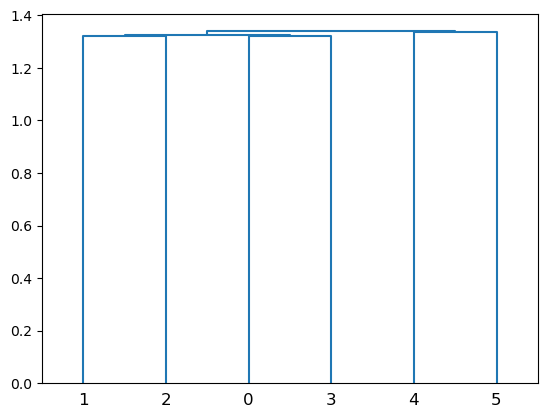

In [27]:
Distance = squareform(Distance)
linkage_matrix = linkage(Distance, "single")
dendrogram(linkage_matrix)
plt.show()

In [28]:
#14 Stocks
GARCH_Array = np.array([[1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0],
                        [1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.1,0.01,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.05,0.1,0.1,0.1,0.1,0.01,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0],
                        [1,0.1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])

file_name = "C:/Users/phbcat/OneDrive - Loughborough University/Individual project\Stocks vs comodities.csv"
Stocks_vs_comodities = pd.read_csv(file_name)
garch = GARCH_Multi(GARCH_Array)
Data_Frame = pd.DataFrame(garch)
Column_name = (list(Stocks_vs_comodities.columns)[1:])
Data_Frame.columns = [Column_name]

Stocks = []

for i in range(len(Data_Frame)):
    Current_time = []
    for j in range(len(Stocks_vs_comodities)):
        Current_stock = 0
        for k in range(len(Stocks_vs_comodities.iloc[0])-1):
            Current_stock += Stocks_vs_comodities.iloc[j][k+1]*Data_Frame.iloc[i][k]
        Current_stock += random_GARCH(1)
        Current_time.append(Current_stock)        
    Stocks.append(Current_time)

Stocks = pd.DataFrame(Stocks)

Text(0.5, 1.0, "GARCH process of 8 interconnected 'comodidties'")

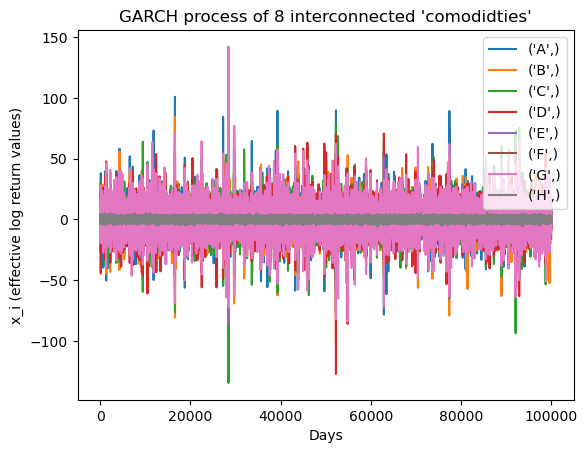

In [29]:

#Comodities.columns = [Stocks_vs_comodities.columns]
#print(Stocks)
plt.plot(Data_Frame, label = Data_Frame.columns)
plt.legend()
plt.xlabel("Days")
plt.ylabel("x_i (effective log return values)")
plt.title("GARCH process of 8 interconnected 'comodidties'")
#print(Data_Frame)

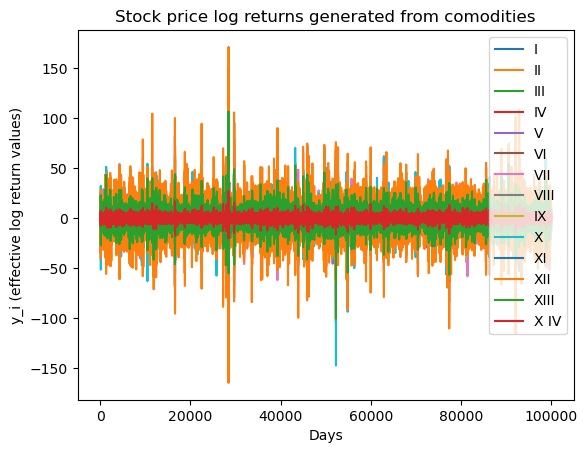

In [30]:
Stocks.columns = [Stocks_vs_comodities["Stocks"]]
Stock_names = [Stocks_vs_comodities["Stocks"]]
#print(Stocks)
plt.plot(Stocks, label=Stocks_vs_comodities["Stocks"])
plt.xlabel("Days")
plt.ylabel("y_i (effective log return values)")
plt.title("Stock price log returns generated from comodities")
plt.legend()
#print(Stocks.columns)

In [31]:
Correlation = (Stocks.corr(numeric_only=False))
Distance = np.sqrt(2*(1-Correlation))
tree = minimum_spanning_tree(Distance)

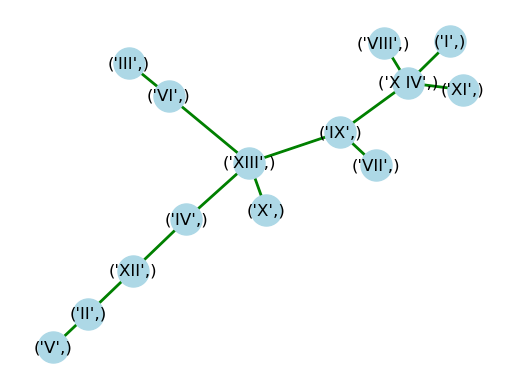

In [32]:
G = nx.Graph()
TREE_ARRAY = tree.toarray()
#TREE_ARRAY = Distance
for i in range(len(TREE_ARRAY)):
    for j in range(len(TREE_ARRAY)):
        if TREE_ARRAY[i][j]!=0:
            G.add_edges_from(
                [
                   (Stocks.columns[i], Stocks.columns[j], {"weight": round(TREE_ARRAY[i][j],2)} ) 
                ]
            )

T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
#nx.draw_networkx_edge_labels(
#    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
#)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()

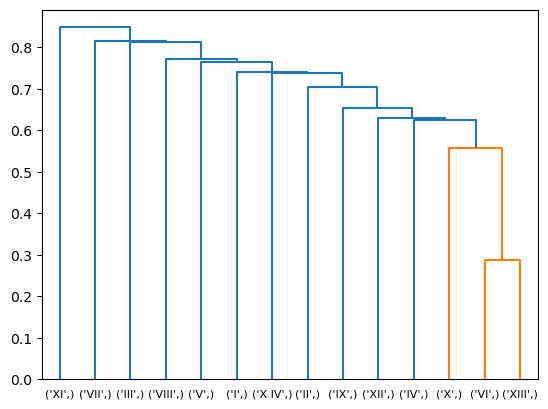

In [33]:
Distance = squareform(Distance)
linkage_matrix = linkage(Distance, "single")
dendrogram(linkage_matrix, labels=Stocks.columns, leaf_font_size=8)
plt.show()

In [34]:
print(Correlation)

Stocks         I        II       III        IV         V        VI       VII  \
Stocks                                                                         
I       1.000000  0.688884  0.649141  0.609163  0.627493  0.670726  0.483789   
II      0.688884  1.000000  0.644868  0.514298  0.707842  0.538451  0.390828   
III     0.649141  0.644868  1.000000  0.588760  0.634785  0.669997  0.160385   
IV      0.609163  0.514298  0.588760  1.000000  0.375251  0.796747  0.307972   
V       0.627493  0.707842  0.634785  0.375251  1.000000  0.575237  0.222780   
VI      0.670726  0.538451  0.669997  0.796747  0.575237  1.000000  0.288286   
VII     0.483789  0.390828  0.160385  0.307972  0.222780  0.288286  1.000000   
VIII    0.700965  0.673864  0.618399  0.603682  0.515632  0.671061  0.499468   
IX      0.724238  0.572125  0.568079  0.698693  0.684536  0.781035  0.668123   
X       0.522012  0.417128  0.524105  0.458982  0.632084  0.833875  0.219521   
XI      0.638057  0.639027  0.546657  0.

In [35]:
print(tree)

  (3, 11)	0.6287247427403928
  (3, 12)	0.6235966475274111
  (4, 1)	0.7644050791833865
  (5, 2)	0.8124072099972527
  (8, 6)	0.814711201477483
  (8, 12)	0.6544670944923248
  (9, 12)	0.557006993644247
  (10, 13)	0.8481413774847967
  (11, 1)	0.7052174198983182
  (12, 5)	0.28625632462388617
  (13, 0)	0.7406199008373908
  (13, 7)	0.7722352626749038
  (13, 8)	0.7386599832058814


Text(0.5, 1.0, 'Scatter diagram showing the relationship between XIII and VI')

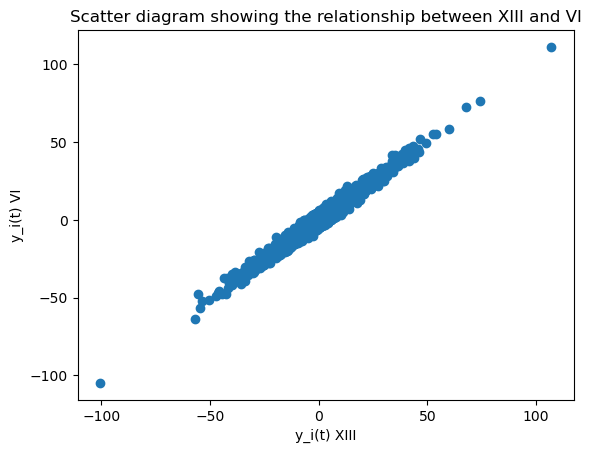

In [36]:
plt.scatter(Stocks['XIII'], Stocks['VI'])
plt.xlabel("y_i(t) XIII")
plt.ylabel("y_i(t) VI")
plt.title("Scatter diagram showing the relationship between XIII and VI")